Epoch: 0, Loss: 102.57275971411129, Accuracy: 11.24%
Epoch: 50, Loss: 102.61679751021597, Accuracy: 11.24%
Epoch: 100, Loss: 102.63395402529824, Accuracy: 11.24%
Epoch: 150, Loss: 102.64932716852732, Accuracy: 11.24%
Epoch: 200, Loss: 102.67633323442787, Accuracy: 18.54%
Epoch: 250, Loss: 102.78584716112708, Accuracy: 25.90%
Epoch: 300, Loss: 103.27960433067166, Accuracy: 33.56%
Epoch: 350, Loss: 104.84225985887315, Accuracy: 41.77%
Epoch: 400, Loss: 108.00087119584789, Accuracy: 48.56%
Epoch: 450, Loss: 112.4299396659631, Accuracy: 54.11%
Epoch: 500, Loss: 117.49907768881538, Accuracy: 58.53%
Epoch: 550, Loss: 122.77953680819384, Accuracy: 62.85%
Epoch: 600, Loss: 128.02795478772597, Accuracy: 67.11%
Epoch: 650, Loss: 133.1309300778302, Accuracy: 70.95%
Epoch: 700, Loss: 138.05274533177138, Accuracy: 73.82%
Epoch: 750, Loss: 142.79095745638256, Accuracy: 76.00%
Epoch: 800, Loss: 147.3504713409739, Accuracy: 77.79%
Epoch: 850, Loss: 151.73473166647673, Accuracy: 79.29%
Epoch: 900, Loss

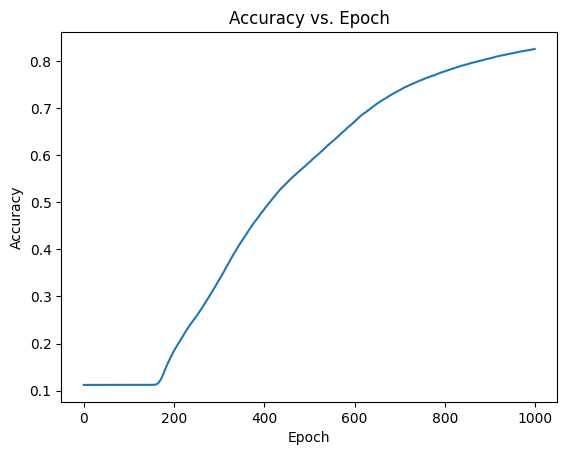

Test accuracy: 83.07%


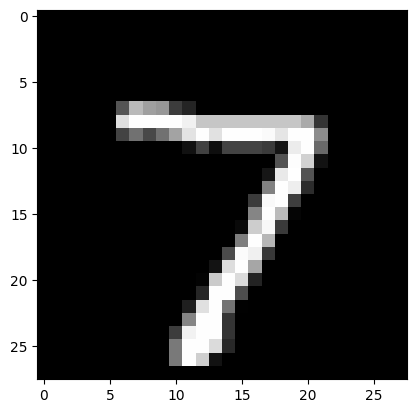

Predicted label: 7
Actual label: 7


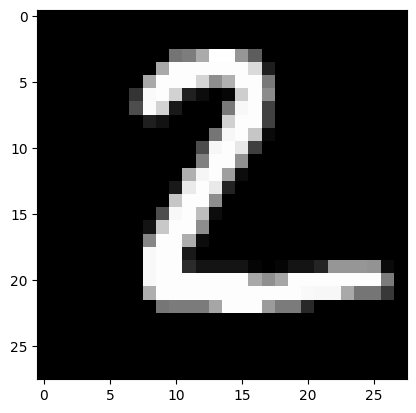

Predicted label: 2
Actual label: 2


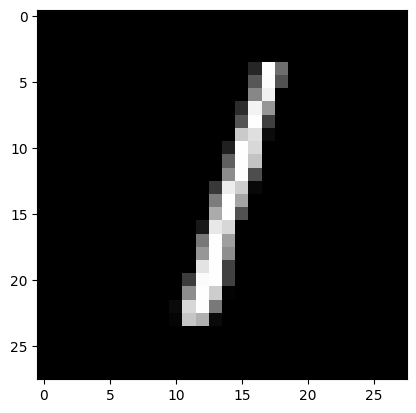

Predicted label: 1
Actual label: 1


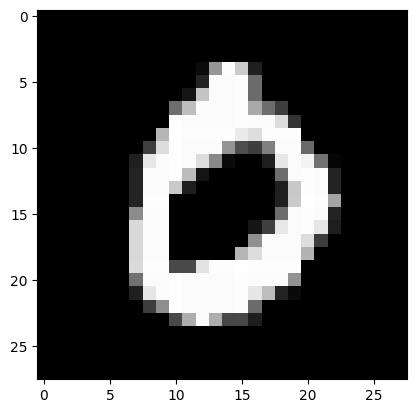

Predicted label: 0
Actual label: 0


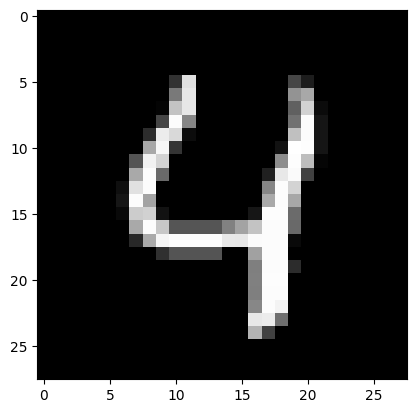

Predicted label: 4
Actual label: 4


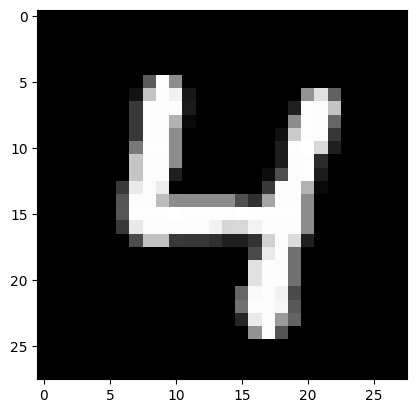

Predicted label: 4
Actual label: 4


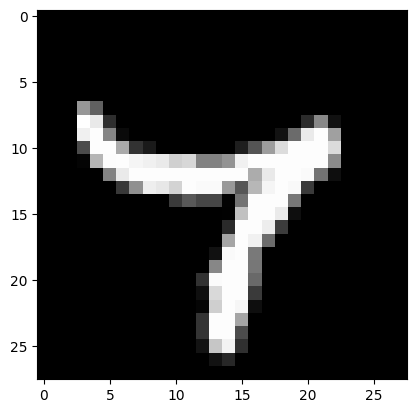

Predicted label: 9
Actual label: 7


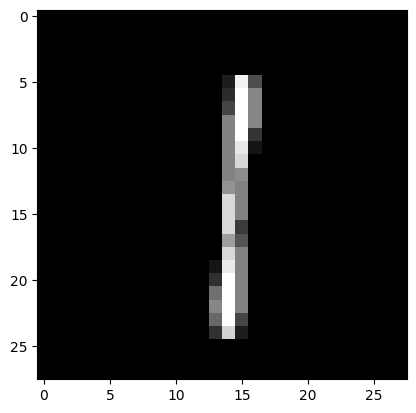

Predicted label: 1
Actual label: 1


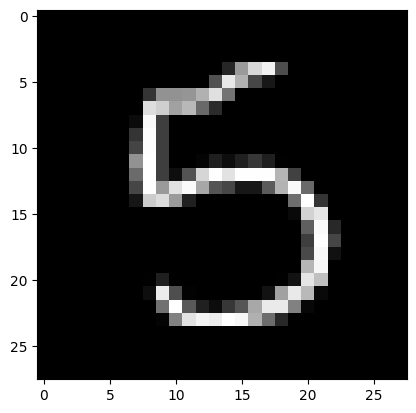

Predicted label: 5
Actual label: 5


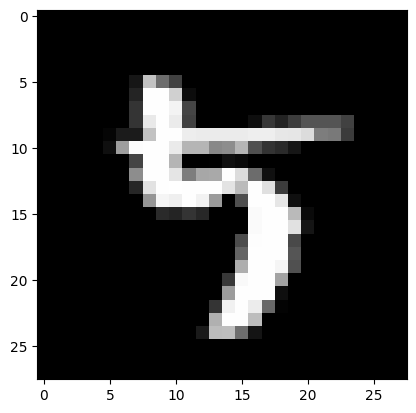

Predicted label: 9
Actual label: 5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, output_size):
        # Initialize weights and biases for the three layers of the network
        self.w1 = 0.01 * np.random.randn(16, input_size)
        self.b1 = np.zeros((16, 1))
        self.w2 = 0.01 * np.random.randn(10, 16)
        self.b2 = np.zeros((10, 1))
        self.w3 = 0.01 * np.random.randn(output_size, 10)
        self.b3 = np.zeros((output_size, 1))

    def forwardPass(self, X):
        # Perform forward propagation through the network
        self.Z1 = np.dot(self.w1, X) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        #uncomment if you wanna use relu as hidden layer and comment line above.
        #self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.w2, self.A1) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def relu(self, Z):
        # Apply the ReLU activation function
        return np.maximum(Z, 0)
    
    def sigmoid(self, Z):
        # Apply the sigmoid activation function
        return 1 / (1 + np.exp(-Z))

    def softmax(self, Z):
        # Apply the softmax activation function
        e = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return e / e.sum(axis=0, keepdims=True)

    def relu_derivative(self, x):
        # Calculate the derivative of the ReLU function
        return (x > 0).astype(int)
    
    def sigmoid_derivative(self, x):
        # Calculate the derivative of the sigmoid function
        return x * (1 - x)

    def one_hot_encoding(self, Y):
        # Perform one-hot encoding on the target labels
        one_hot = np.zeros((Y.size, 10))
        rows = np.arange(Y.size)
        one_hot[rows, Y] = 1
        one_hot = one_hot.T
        return one_hot
    
    def cross_entropy_loss(self, Y, y_pred):
        # Calculate the cross-entropy loss
        m = Y.shape[0]
        loss = -(1/m) * np.sum(Y * np.log(y_pred))
        return loss



    def get_predictions(self, y_pred):
        # Get the predicted class labels
        return np.argmax(y_pred, axis=0)
    



    def accuracy(self, pred, Y):
        # Calculate the accuracy of the predictions
        return np.sum(pred == Y) / Y.size
    
    def sgd(self, dw1, db1, dw2, db2, learning_rate):
        # Update the weights and biases using SGD
        self.w1 -= learning_rate * dw1
        self.b1 -= learning_rate * db1.sum(axis=1, keepdims=True)
        self.w2 -= learning_rate * dw2
        self.b2 -= learning_rate * db2.sum(axis=1, keepdims=True)


    def backwardPass(self, X, Y, y_pred, learning_rate=0.1):
        # Perform backpropagation to update the weights and biases
        m = Y.size
        one_hot_y = self.one_hot_encoding(Y)
        e2 = y_pred - one_hot_y
        dw2 = (1/m) * np.dot(e2, self.A1.T)
        db2 = (1/m) * e2
        e1 = self.w2.T.dot(e2) * self.sigmoid_derivative(self.A1)
        #uncomment if you wanna use relu as hidden layer and comment line above.
        #e1 = self.w2.T.dot(e2) * self.relu_derivative(self.A1)
        dw1 = (1/m) * np.dot(e1, X.T)
        db1 = (1/m) * e1
        
        self.sgd(dw1, db1, dw2, db2, learning_rate)
        
    

    def train(self, X, Y, epochs=1000, learning_rate=0.1):
        for epoch in range(epochs):
            # Perform forward propagation
            y_pred = self.forwardPass(X)
        
            # Calculate the cross-entropy loss
            loss = self.cross_entropy_loss(Y, y_pred)

            # Get the predictions
            predictions = self.get_predictions(y_pred)

            # Calculate the accuracy
            accuracy = self.accuracy(predictions, Y)
            if epoch % 50 == 0:
            # Display the accuracy
                print(f"Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy*100:.2f}%")

            # Perform backpropagation
            self.backwardPass(X, Y, y_pred, learning_rate)
            epochsList.append(epoch)
            losses.append(loss.item())
            accuracies.append(accuracy)
        
        # Return the final weights and biases
        return self.w1, self.b1, self.w2, self.b2
    
    

# Load MNIST data
df = pd.read_csv('../data/MNIST/mnist_train.csv')
data = np.array(df.values)
data = data.T
Y_train = data[0,:]
X_train = data[1:,:]

df_test = pd.read_csv('../data/MNIST/mnist_test.csv')
data_test = np.array(df_test.values)
data_test = data_test.T
Y_test = data_test[0,:]
X_test = data_test[1:,:]

# Normalize the data
X_train = X_train / 255

X_test = X_test / 255

epochsList = []
losses = []
accuracies = []

def display_prediction(nn, X, Y, index):
    # Predict the label for the given image
    y_pred = nn.forwardPass(X[:, index:index+1])
    predicted_label = nn.get_predictions(y_pred)[0]

    # Display the image
    plt.imshow(X[:, index:index+1].reshape(28, 28), cmap='gray')
    plt.show()

    # Print the predicted label and the actual label
    print("Predicted label:", predicted_label)
    print("Actual label:", Y[index])

# Initialize the neural network
nn = NeuralNetwork(input_size=784, output_size=10)

# Train the network
w1,b1,w2,b2= nn.train(X_train, Y_train)



# Plot the accuracy over the epochs
plt.plot(epochsList, accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.show()
#print (epochsList)
#print(accuracies)

# Test the network on the validation set
y_pred = nn.forwardPass(X_test)
predictions = nn.get_predictions(y_pred)
accuracy = nn.accuracy(predictions, Y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')
display_prediction(nn, X_test, Y_test, 0)
display_prediction(nn, X_test, Y_test, 1)
display_prediction(nn, X_test, Y_test, 2)
display_prediction(nn, X_test, Y_test, 3)
display_prediction(nn, X_test, Y_test, 4)
display_prediction(nn, X_test, Y_test, 56)
display_prediction(nn, X_test, Y_test, 124)
display_prediction(nn, X_test, Y_test, 357)
display_prediction(nn, X_test, Y_test, 53)
display_prediction(nn, X_test, Y_test, 951)
